Импортируйте нужные библиотеки
===
Мы уже много работали с  pandas, numpy и различными инструментами визуализации. Поэтому предлагаем вам самим импортировать те библиотеки, которые вам нужны для выполнения домашнего задания 

Временной ряд 
=== 
В папке datasets у нас находится множество различных временных рядов, которые состоят из двух колонок - времени и значения. Можно взять любые данные на выбор, кроме того, который мы разобрали на лекции (shampoo_sales). 

Задание 
==

* Сделайте визуализацию ряда
* Разбейте его на компоненты
* Проверьте автокорреляцию
* Примените одну или несколько трансформаций, разобранных на лекции

Загрузка библиотек

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objects import *
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
df = pd.read_csv('../datatest/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
#df.set_index('Month', inplace=True)

In [32]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Визуализация ряда

In [47]:
iplot(Figure(data=Scatter(x=df["Month"], y=df["Passengers"])))

In [36]:
s = pd.Series(index=df['Month'],
             data=df['Passengers'].values)

Декомпозиция ряда

In [50]:
results = seasonal_decompose(s, 'additive')

<AxesSubplot:xlabel='Month'>

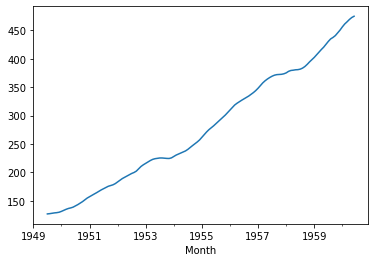

In [51]:
results.trend.plot()

<AxesSubplot:xlabel='Month'>

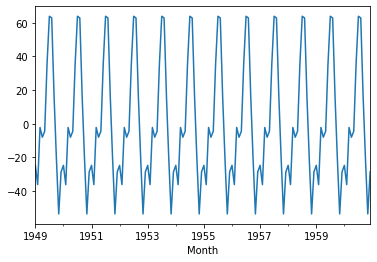

In [49]:
results.seasonal.plot()

<AxesSubplot:xlabel='Month'>

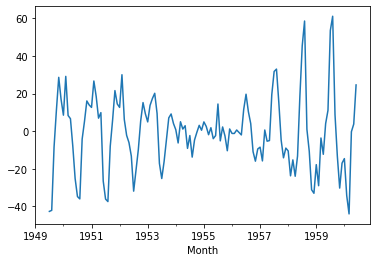

In [48]:
results.resid.plot()

Проверка автокорреляции

In [46]:
df['Passengers_lag1'] = df['Passengers'].shift(1)
df.corr()['Passengers_lag1']

Passengers         0.960195
Passengers_lag1    1.000000
Name: Passengers_lag1, dtype: float64

Применение трансформации

In [42]:
df['boxcox']=boxcox(df['Passengers'],lmbda=0)
iplot(Figure(data=Scatter(x=df['Month'],y=df['boxcox'])))